# Sales Prediction Using Python

In [36]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as pt 

import seaborn as sea


In [4]:
train = pd.read_csv('Advertising.csv')

train.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
train.shape


(200, 5)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
train.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
train.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

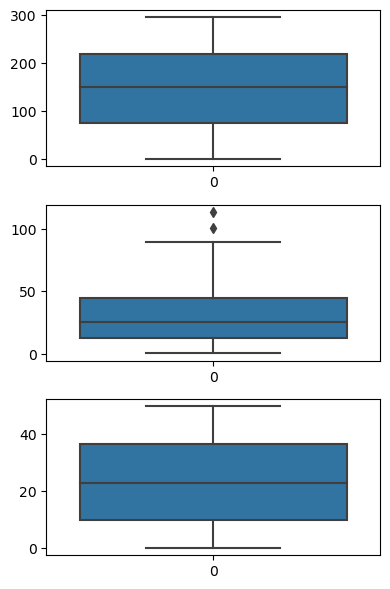

In [19]:
fig, axs = pt.subplots(3, figsize = (4,6))

p1 = sea.boxplot(train['TV'], ax = axs[0])

p2 = sea.boxplot(train['Newspaper'], ax = axs[1])

p3 = sea.boxplot(train['Radio'], ax = axs[2]) 

pt.tight_layout()

C:\Users\user\AppData\Local\Temp\ipykernel_21016\4099581364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(train['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

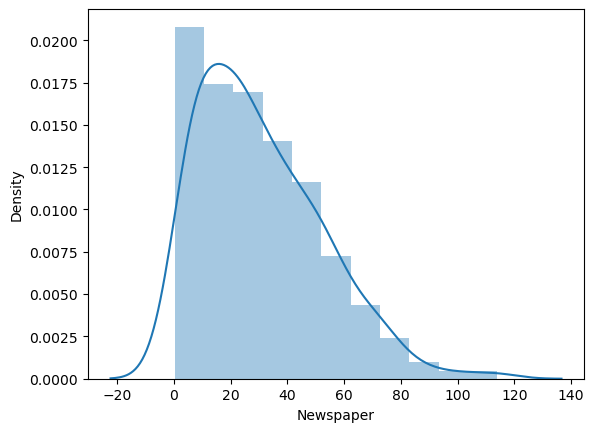

In [20]:
sea.distplot(train['Newspaper'])

In [22]:
qr= train.Newspaper.quantile(0.75) - train.Newspaper.quantile(0.25)


In [23]:
l_bridge = train["Newspaper"].quantile(0.25) - (qr*1.5)

u_bridge = train["Newspaper"].quantile(0.75) + (qr*1.5)

print(l_bridge)

print(u_bridge)

-35.775000000000006
93.625


In [24]:
data = train.copy()

In [25]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

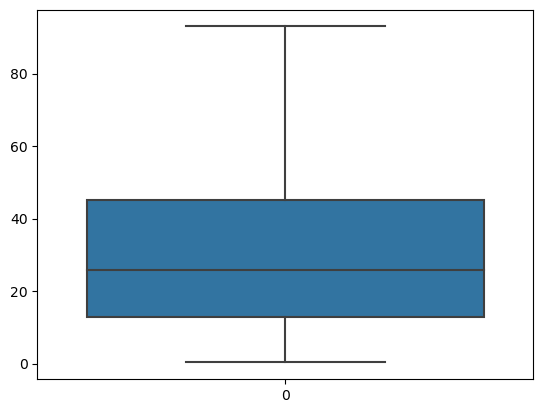

In [29]:
sea.boxplot(data['Newspaper'])


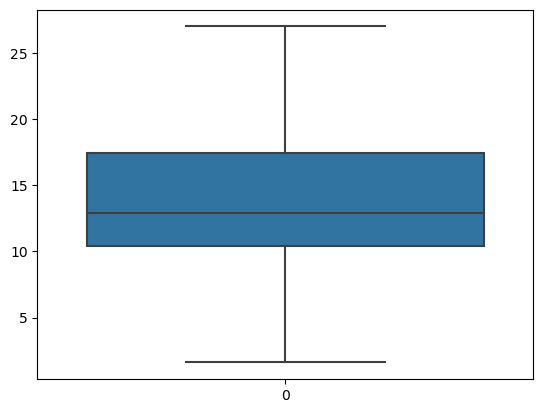

In [28]:
sea.boxplot(data['Sales']);

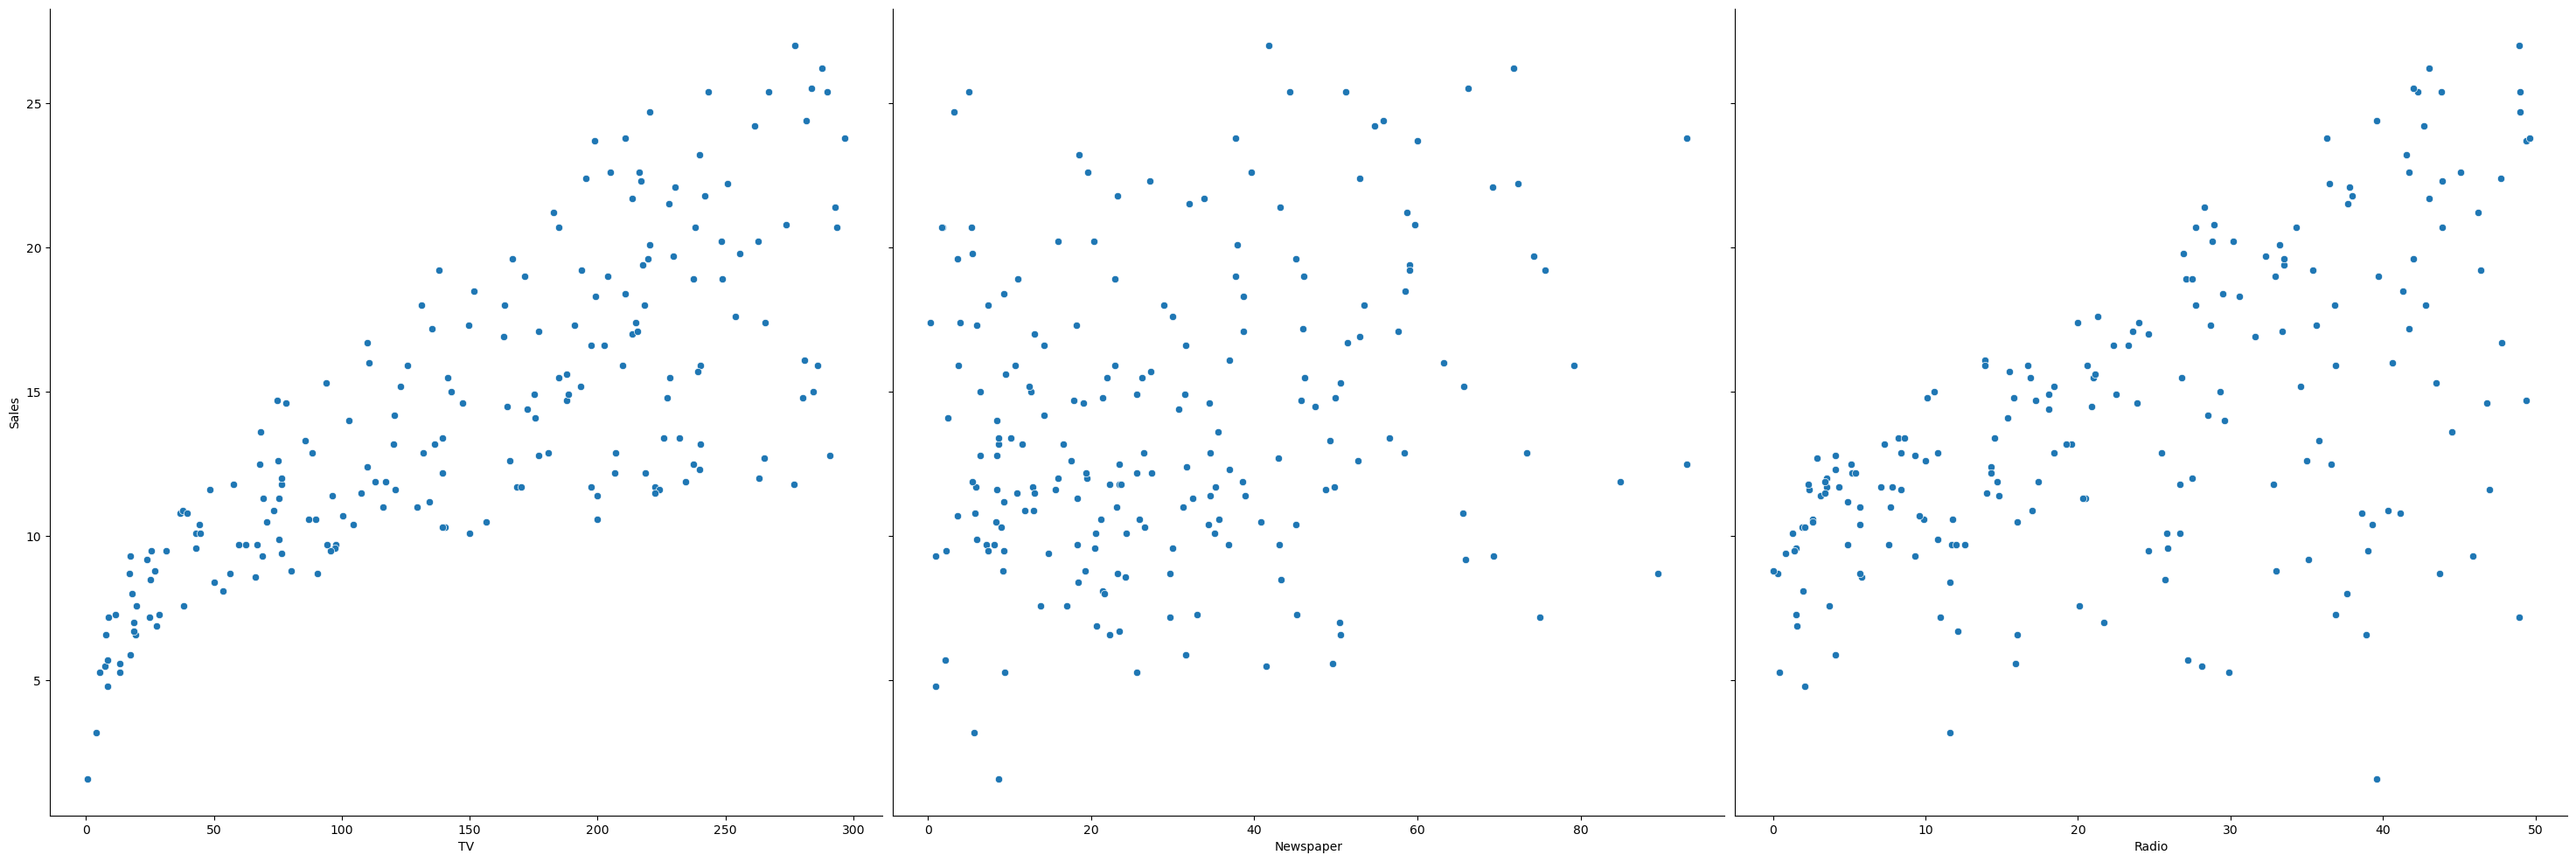

In [40]:
sea.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=10, aspect=1, kind='scatter')


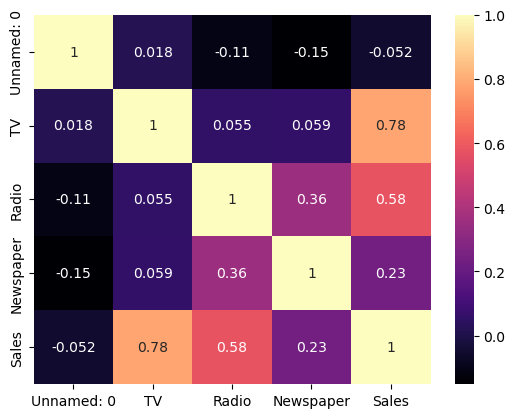

In [43]:
sea.heatmap(data.corr(), cmap="magma", annot = True) 
pt.show()

In [45]:
imp_features = list(train.corr()['Sales'][(train.corr()['Sales']>+0.5)|(train.corr()['Sales']<-0.5)].index)

In [47]:
 print(imp_features)

['TV', 'Radio', 'Sales']


In [49]:
x=data['TV']

y=data['Sales']

In [51]:
x=x.values.reshape(-1,1)

In [52]:
print(x.shape,y.shape)

(200, 1) (200,)


In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.50)


In [54]:
print(x_train.shape,y_train.shape)


(100, 1) (100,)


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor 

from sklearn.ensemble import RandomForestRegressor

In [58]:
k=KNeighborsRegressor().fit(x_train, y_train)
k

KNeighborsRegressor()

In [59]:
k_train_pred= k.predict(x_train)

In [64]:
k_test_pred= k.predict(x_test)

In [65]:
print(k_train_pred, k_test_pred)

[18.62 15.   11.72  9.8  14.7   7.96 11.72 17.54 14.72 19.7  15.76  9.58
 18.16  9.72 10.16 18.66 15.3  16.2  15.54  5.66 17.8  14.64 19.52 21.16
 22.94 21.16 18.04 19.2  16.64  7.96 10.64 17.36 15.92 15.1  16.64  6.94
 14.72 13.92  7.38 10.02 19.7  14.84 17.8   9.8  11.72  6.68 17.86 17.36
 10.64 11.6  17.54 15.   22.94 16.9  11.46 15.1  16.64 19.38 17.52 11.28
 19.52  6.14 11.   15.54 15.18 11.72 17.8   7.38 19.2  10.9  15.28 12.5
 10.66 17.52  9.72 10.64  7.38 15.18 11.46  9.84  9.4   6.68  7.96 16.08
 10.02 15.28 15.24  7.38  7.96 18.62  5.66 14.18 16.64 11.72 14.88  9.8
 14.76 17.36  7.38 14.88] [17.54 14.84  7.96 15.1  17.36 17.8   9.76 10.08  5.66 10.78 17.62 10.16
 14.72 17.8  15.    5.66 16.18 14.84 17.54 11.6  10.66 14.84 22.94 11.28
  7.96  5.66 14.7  11.72 17.8  11.6  16.2  11.46 15.   21.16 14.18  9.8
 16.18 16.64 16.22 14.02 15.18  7.38 11.72 14.02 18.7   7.38 18.04 18.16
 10.66 21.16 10.66 11.6  19.2  15.1  14.76 22.94 19.2  17.92 17.92 14.84
 17.62  9.4  18.66 22.94 18.

In [66]:
Results=pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Test RMSE", "Variance"])

In [68]:
r2=r2_score(y_test,k_test_pred)

r2_train=r2_score(y_train,k_train_pred)

rmse=np.sqrt(mean_squared_error(y_test,k_test_pred))

variance=r2_train - r2

Results=Results.append({"Model":"K-Nearest Neighbors", "Train R2":r2_train, "Test R2": 2, "Test RMSE":rmse,"Variance":variance}, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21016\2143059233.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append({"Model":"K-Nearest Neighbors", "Train R2":r2_train, "Test R2": 2, "Test RMSE":rmse,"Variance":variance}, ignore_index=True)


In [69]:
print("R2:",r2)

print("RMSE:",rmse)

R2: 0.5675336448907162
RMSE: 3.3615585670935437


In [70]:
Results.head()


,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.629804,2,3.361559,0.06227


In [73]:
s = SVR().fit(x_train,y_train)

In [74]:
s


SVR()

In [75]:
svr_train=s.predict(x_train)
svr_test=s.predict(x_test)

In [76]:
print(svr_train,svr_test)

[16.28833942 15.23558104 10.48335738  8.63734136 13.68541168  8.1339072
 10.49339712 16.53012195 16.60442186 16.48650664 13.89377194  9.68355046
 16.44985999  8.86254416 11.54741369 16.39205538 14.86759237 16.54614539
 15.77320592  7.66114647 16.67852051 14.63912355 16.0523428  16.13190022
 15.87068662 16.20024752 16.02557923 16.67944683 15.67780478  8.07340786
 11.07024265 16.30975162 16.55130302 13.36821822 15.65607919  7.76133711
 16.58915256 15.04610049  7.92077167  8.92906979 16.47291859 13.51487327
 16.67827845  8.57989477 10.53850643  7.79029995 16.66102856 16.33460983
 11.22437743 10.10335797 16.49705432 15.23558104 15.97692819 15.84463924
 12.13527109 13.12771284 15.54849191 15.91676877 16.51539669 10.01648972
 16.03157038  7.71234538 11.89373682 14.33082971 14.00716986 10.38771048
 16.67287013  7.9234829  16.66222824 11.69769662 14.99439075 12.47846724
 11.50024751 16.50760587  8.85782588 11.12339441  7.89950494 14.09200483
 12.27900444  9.19764472  9.50996424  7.78827822  8.

In [78]:
r2=r2_score(y_test,svr_test)

r2_train=r2_score(y_train,svr_train)

rmse=np.sqrt(mean_squared_error(y_test, svr_test))

variance=r2_train - r2

Results=Results.append({"Model":"Support Vector Machine", "Train R2":r2_train, "Test R2":r2, "Test RMSE":rmse, "Variance":variance}, ignore_index=True)

print("R2:",r2)

print("RMSE:",rmse)                       

R2: 0.5365342829658901
RMSE: 3.47995258351229


C:\Users\user\AppData\Local\Temp\ipykernel_21016\2358641530.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append({"Model":"Support Vector Machine", "Train R2":r2_train, "Test R2":r2, "Test RMSE":rmse, "Variance":variance}, ignore_index=True)


In [79]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.629804,2,3.361559,0.062270
1,Support Vector Machine,0.544682,0.536534,3.479953,0.008148


In [81]:
import statsmodels.api as sm

In [84]:
x_train_const=sm.add_constant(x_train)

In [85]:
model=sm.OLS(y_train,x_train_const).fit()

In [86]:
model.params

const    6.991945
x1       0.048179
dtype: float64

In [87]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     148.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.36e-21
Time:                        18:10:26   Log-Likelihood:                -262.28
No. Observations:                 100   AIC:                             528.6
Df Residuals:                      98   BIC:                             533.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9919      0.653     10.708      0.0

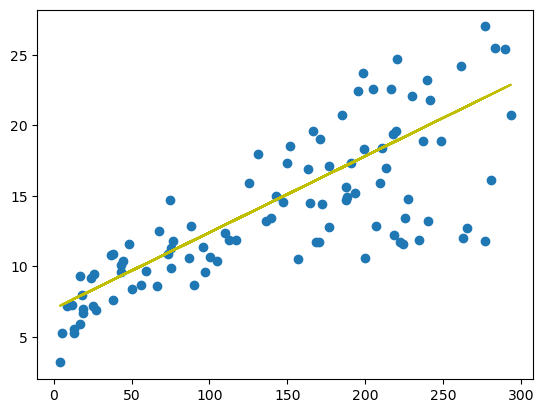

In [90]:
pt.scatter(x_train, y_train)

pt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')

pt.show()

In [92]:
y_train = model.predict(x_train_const) 
res = (y_train - y_train)

res

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])